In [25]:
import renyi
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data1 = np.random.normal(0,1,10000)
data2 = np.random.normal(0,0.1,10000)
y1,x1 = np.histogram(data1, bins=21,density=1)
y2,x2 = np.histogram(data2, bins=21,density=1)
pdf1 = lambda x: stats.norm.pdf(x,0,1)
pdf2 = lambda x: stats.norm.pdf(x,0,0.1)

ent1 = []
ent2 = []
ent1pdf = []
ent2pdf = []

rang = np.arange(0.1,2,0.1)

for i in rang:
    ent1.append(renyi.renyi_hist_entropy(x1,y1,i))
    ent2.append(renyi.renyi_hist_entropy(x2,y2,i))
    ent1pdf.append(renyi.renyi_entropy_cont(pdf1,i,minimum=-10,maximum=10))
    ent2pdf.append(renyi.renyi_entropy_cont(pdf2,i,minimum=-1,maximum=1))

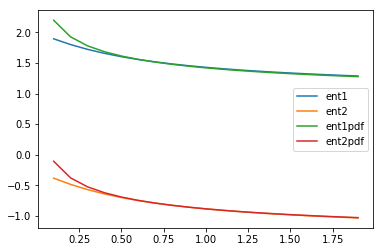

In [26]:
plt.plot(rang,ent1,label="ent1")
plt.plot(rang,ent2,label="ent2")
plt.plot(rang,ent1pdf,label="ent1pdf")
plt.plot(rang,ent2pdf,label="ent2pdf")

plt.legend()
plt.show()

In [27]:
help(renyi.renyi_entropy_cont)

Help on function renyi_entropy_cont in module renyi:

renyi_entropy_cont(pdf, alpha, minimum=-inf, maximum=inf)
    Returns the renyi entropy for continuous variable.
    If alpha=1, you must define minimum and maximum.



# TEST: entropije beta porazdelitev

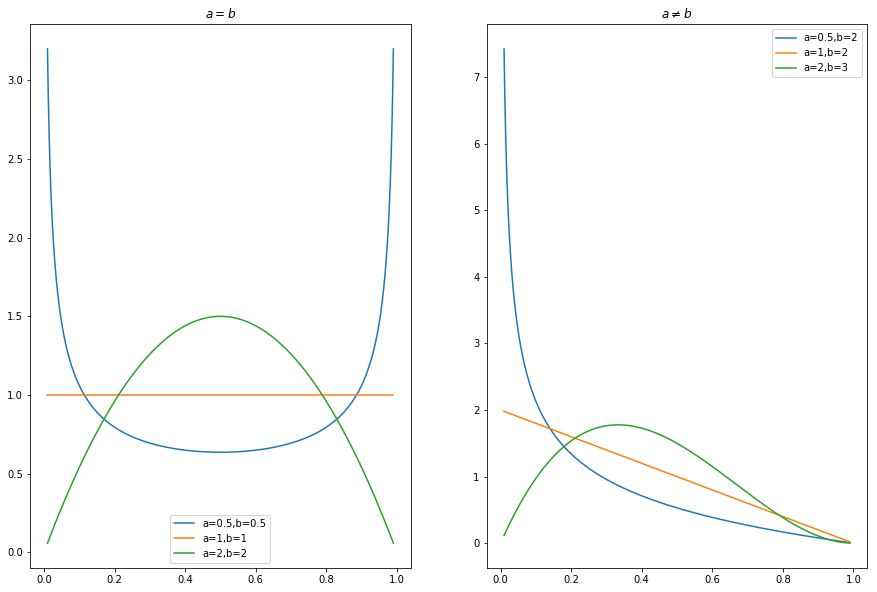

In [28]:
tocna1 = lambda x: stats.beta.pdf(x,0.5,0.5)
tocna2 = lambda x: stats.beta.pdf(x,1,1)
tocna3 = lambda x: stats.beta.pdf(x,2,2)
tocna4 = lambda x: stats.beta.pdf(x,0.5,2)
tocna5 = lambda x: stats.beta.pdf(x,1,2)
tocna6 = lambda x: stats.beta.pdf(x,2,3)

x = np.linspace(0.01,0.99,1000)

plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.title(r"$a = b$")
plt.plot(x,tocna1(x),label="a=0.5,b=0.5")
plt.plot(x,tocna2(x),label="a=1,b=1")
plt.plot(x,tocna3(x),label="a=2,b=2")
plt.legend()

plt.subplot(1,2,2)
plt.title(r"$a \neq b$")
plt.plot(x,tocna4(x),label="a=0.5,b=2")
plt.plot(x,tocna5(x),label="a=1,b=2")
plt.plot(x,tocna6(x),label="a=2,b=3")
plt.legend()

plt.show()

In [29]:
beta0505 = []
beta1010 = []
beta2020 = []
beta0520 = []
beta1020 = []
beta2030 = []


for i in rang:
    beta0505.append(renyi.renyi_entropy_cont(tocna1,i,0,1))
    beta1010.append(renyi.renyi_entropy_cont(tocna2,i,0,1))
    beta2020.append(renyi.renyi_entropy_cont(tocna3,i,0,1))
    beta0520.append(renyi.renyi_entropy_cont(tocna4,i,0,1))
    beta1020.append(renyi.renyi_entropy_cont(tocna5,i,0,1))
    beta2030.append(renyi.renyi_entropy_cont(tocna6,i,0,1))

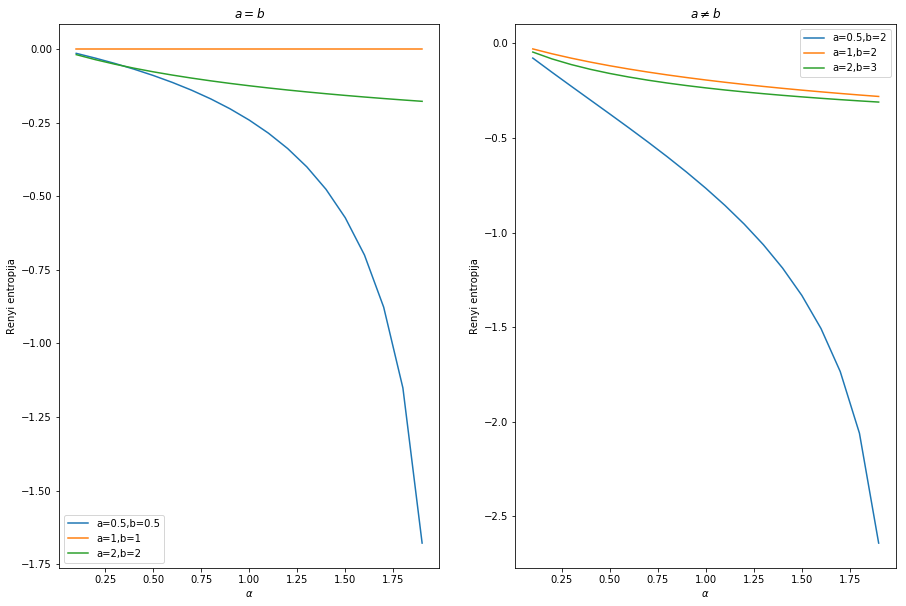

In [30]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.title(r"$a = b$")
plt.plot(rang,beta0505,label="a=0.5,b=0.5")
plt.plot(rang,beta1010,label="a=1,b=1")
plt.plot(rang,beta2020,label="a=2,b=2")
plt.xlabel(r"$\alpha$")
plt.ylabel("Renyi entropija")
plt.legend()

plt.subplot(1,2,2)
plt.title(r"$a \neq b$")
plt.plot(rang,beta0520,label="a=0.5,b=2")
plt.plot(rang,beta1020,label="a=1,b=2")
plt.plot(rang,beta2030,label="a=2,b=3")
plt.xlabel(r"$\alpha$")
plt.ylabel("Renyi entropija")
plt.legend()

plt.show()